  <div style="text-align: center;">

 # USED CAR ANALYSIS

![Used Car Photo](https://spn-sta.spinny.com/blog/20220228142243/ezgif.com-gif-maker-98-5.jpg)

</div>

                                  


 # Regression_Case_Study

**PROBLEM STATEMENT**

There is a huge demand of used cars in the Indian Market today. As sale of new car have slowed down in the recent past, the pre-owned car market has continued to grow over the past year and is larger than the new car market now. Consider this: In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones.

The goal of the case is as follows:

- The one major factor that holds anyone back while buying a used car is the price(target variable).You will be predicting the Price of used cars with the data collected from various sources and distributed across various locations in India.
- Compare different models and find out which one is the most suitable in this case in predicting the prices.

**Data Dictionary**

1. **Name:** The brand and model of the car.
2. **Location:** The location in which the car is being sold or is available for purchase.
3. **Year:** The year or edition of the model.
4. **Kilometers_Driven:** The total kilometers driven in the car by the previous owner(s) in KM.
5. **Fuel_Type:** The type of fuel used by the car.
6. **Transmission:** The type of transmission used by the car.
7. **Owner_Type:** Whether the ownership is Firsthand, Second hand or other.
8. **Mileage:** The standard mileage offered by the car company in kmpl or km/kg
9. **Engine:** The displacement volume of the engine in cc.
10. **Power:** The maximum power of the engine in bhp.
11. **Seats:** The number of seats in the car.
12. **New_Price:** The price of a new car of the same model.
13. **Price:** The price of the used car in INR Lakhs.



 ### Import Necessary Libraries



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay  
)

from sklearn import tree

**Purpose**
- We import essential libraries for data manipulation, visualization, and modeling.

 **Load the Dataset**



In [9]:
cars=pd.read_csv('Cars.csv')

**Purpose**
- Loading the used cars dataset for analysis.

 ###  Initial_Data_Overview



 **Shape of the Data**

In [13]:
cars.shape

(5961, 15)

  **Types of the Data** 

In [15]:
cars.dtypes

Name                  object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Colour                object
Seats                float64
No. of Doors         float64
New_Price             object
Price                float64
dtype: object

 **Read the Data** 

In [17]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


In [18]:
cars =cars[cars['Year'] >= 2000] 

- remove older data if resale of vehicles of tht year not allowed anymore

 **Check the Info**

In [21]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5953 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5953 non-null   object 
 1   Location           5942 non-null   object 
 2   Year               5953 non-null   float64
 3   Kilometers_Driven  5945 non-null   float64
 4   Fuel_Type          5953 non-null   object 
 5   Transmission       5926 non-null   object 
 6   Owner_Type         5938 non-null   object 
 7   Mileage            5951 non-null   object 
 8   Engine             5936 non-null   object 
 9   Power              5922 non-null   object 
 10  Colour             5942 non-null   object 
 11  Seats              5948 non-null   float64
 12  No. of Doors       5952 non-null   float64
 13  New_Price          822 non-null    object 
 14  Price              5953 non-null   float64
dtypes: float64(5), object(10)
memory usage: 744.1+ KB


**Get the Summary Statistics**

In [23]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5953,211,Maruti Swift,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5942,11,Mumbai,780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5953.0,NaN,NaN,NaN,2013.404334,3.209209,2000.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,5945.0,NaN,NaN,NaN,58683.024222,91762.574439,171.0,33915.0,53000.0,73000.0,6500000.0
Fuel_Type,5953,5,Diesel,3186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5926,2,Manual,4218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5938,4,First,4871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5951,439,18.9 kmpl,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,5936,142,1197 CC,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,5922,369,74 bhp,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 ## EDA 

**Null Values**

In [26]:
cars.isnull().sum()

Name                    0
Location               11
Year                    0
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  31
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5131
Price                   0
dtype: int64

**% Null values**

In [28]:
cars.isnull().sum()/cars.isnull().sum().sum()*100

Name                  0.000000
Location              0.209165
Year                  0.000000
Kilometers_Driven     0.152120
Fuel_Type             0.000000
Transmission          0.513406
Owner_Type            0.285225
Mileage               0.038030
Engine                0.323255
Power                 0.589466
Colour                0.209165
Seats                 0.095075
No. of Doors          0.019015
New_Price            97.566077
Price                 0.000000
dtype: float64

**Next Step**
- Since New_Price has over 97% Null values, we would drop this column for now

In [30]:
cars=cars.drop('New_Price',axis=1)

In [31]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,6.40


**Check for Duplicates**

In [33]:
cars.duplicated().sum()

2

In [34]:
cars.drop_duplicates(inplace=True)

**Check for Object Data Type**

In [36]:
cars.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver
1,Maruti Baleno,Kochi,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White
3,Hyundai Grand,Delhi,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White
4,Toyota Innova,Delhi,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others


**Next Step**
&#8594; **It seems that the columns Mileage, Engine , Power needs to be cleaned and converted to Float/int dtype**

In [38]:
cars['Mileage'] = cars['Mileage'].str.replace(',','').str.replace('kmpl','').str.replace('km/kg','').astype('float')

In [39]:
cars['Engine'] = cars['Engine'].str.replace(',','').str.replace('CC','').astype('float')

In [40]:
cars['Power'] = cars['Power'].replace('null bhp', 0)
cars['Power'] = cars['Power'].str.replace(',','').str.replace('bhp','').astype('float')

In [41]:
cars.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Colour
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,Black/Silver
1,Maruti Baleno,Kochi,Petrol,Manual,First,Others
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,White
3,Hyundai Grand,Delhi,Diesel,Manual,First,White
4,Toyota Innova,Delhi,Diesel,Manual,First,Others


**Next Step** &#8594; **Create a new column 'Brand' & 'Model' which has the brand name of the Cars**

**Purpose**
- Brand (Mahindra): Strongly influences price due to brand reputation and resale value (luxury brands > mass-market).
- Model (Bolero): Captures model-specific popularity, features, and demand, which directly affect price.
- Both are high-impact categorical features; separating them improves model accuracy for prediction and allows better counting/analysis than full 'Name' string.



In [44]:
cars['Brand']=cars.Name.apply(lambda x:x.split(' ')[0])

In [45]:
cars.Brand.value_counts()

Brand
Maruti           1182
Hyundai          1100
Honda             599
Toyota            410
Mercedes-Benz     317
Volkswagen        315
Ford              298
Mahindra          272
BMW               267
Audi              236
Tata              184
Skoda             173
Renault           143
Chevrolet         113
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Smart               1
Lamborghini         1
Bentley             1
Name: count, dtype: int64

**Observation** &#8594; 

- Brand Isuzu is available twice in different cases ('ISUZU', 'Isuzu'). To avoid this being considered as 2 different brands, correct to single format

In [47]:
cars['Brand'] = cars['Brand'].str.replace('ISUZU', 'Isuzu')

In [48]:
cars.Brand.value_counts()

Brand
Maruti           1182
Hyundai          1100
Honda             599
Toyota            410
Mercedes-Benz     317
Volkswagen        315
Ford              298
Mahindra          272
BMW               267
Audi              236
Tata              184
Skoda             173
Renault           143
Chevrolet         113
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Isuzu               3
Force               3
Smart               1
Lamborghini         1
Bentley             1
Name: count, dtype: int64

**Next Step**&#8594; **Create a new column 'Model' which has the Model name of the Cars**

In [50]:
cars['Model']=cars.Name.apply(lambda x: ' '.join(x.split(' ')[1:]))

In [51]:
pd.options.display.max_rows=300
cars['Model'].value_counts().sort_index(ascending=True)

Model
1                     3
3                    98
5                    68
6                     7
7                    13
800                  12
A                     8
A-Star               17
A3                    4
A4                   78
A6                   49
A7                    3
A8                    2
Accent               18
Accord               26
Alto                142
Amaze               105
Ameo                 19
Aspire                4
Aveo                 14
Avventura             4
B                    12
BR-V                  3
BRV                   5
Baleno               62
Beat                 46
Beetle                1
Bolero               15
Bolt                  4
Boxster               1
Brio                 60
C-Class               3
CLA                  13
CLS-Class             1
CR-V                 26
Camry                11
Captiva               2
Captur                3
Cayenne               7
Cayman                2
Cedia                 2
Celerio   

In [52]:
pd.options.display.max_rows=300
cars['Model'].value_counts().sort_index(ascending=True)

Model
1                     3
3                    98
5                    68
6                     7
7                    13
800                  12
A                     8
A-Star               17
A3                    4
A4                   78
A6                   49
A7                    3
A8                    2
Accent               18
Accord               26
Alto                142
Amaze               105
Ameo                 19
Aspire                4
Aveo                 14
Avventura             4
B                    12
BR-V                  3
BRV                   5
Baleno               62
Beat                 46
Beetle                1
Bolero               15
Bolt                  4
Boxster               1
Brio                 60
C-Class               3
CLA                  13
CLS-Class             1
CR-V                 26
Camry                11
Captiva               2
Captur                3
Cayenne               7
Cayman                2
Cedia                 2
Celerio   

**Observation** &#8594; 

- Model Ecosport is available twice in different cases ('Ecosport', 'EcoSport'). To avoid this being considered as 2 different models, correct to single format

In [54]:
cars['Model'] = cars['Model'].str.replace('EcoSport', 'Ecosport')

In [55]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,6.00,Mahindra,Scorpio
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,8.32,Maruti,Baleno
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,4.00,Mahindra,Xylo
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,3.49,Hyundai,Grand
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,6.40,Toyota,Innova


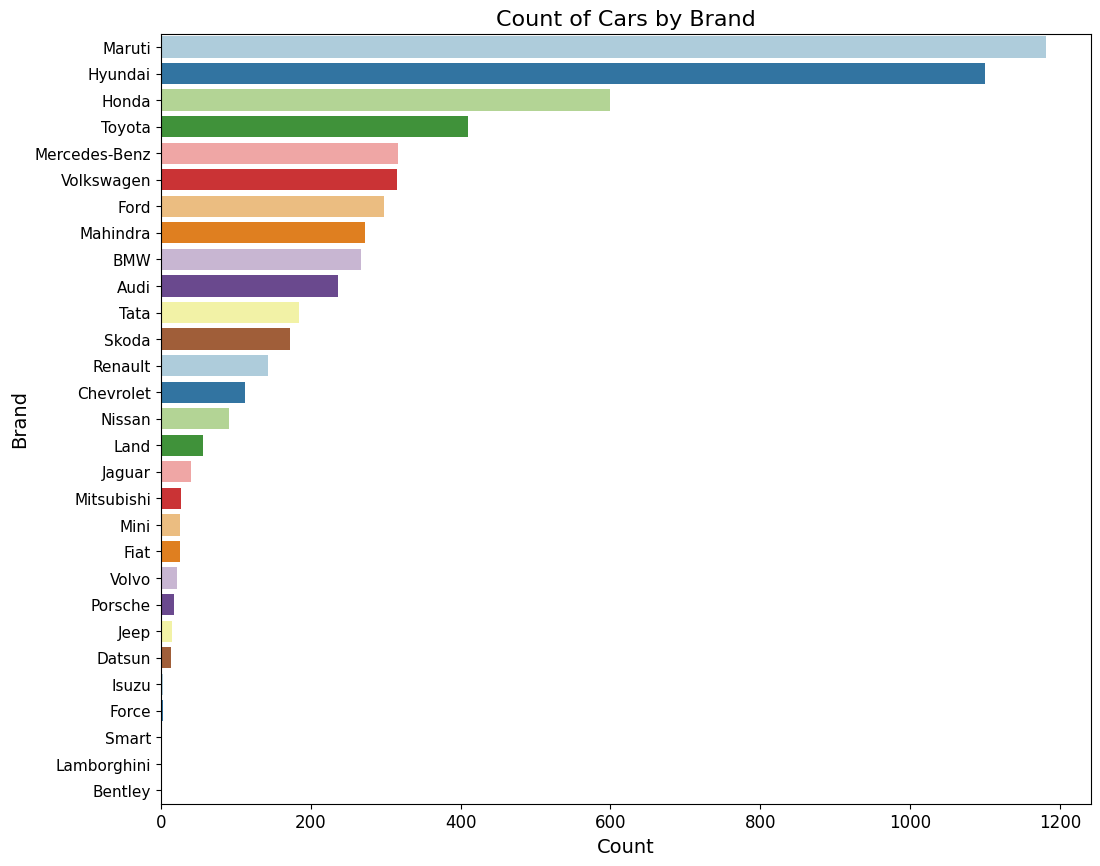

In [56]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  # for increasing Hights

sns.countplot(
    y='Brand',
    data=cars,
    palette='Paired',     # bright & colors
    # palette='tab20'                   # alternative: 20 strong bright colors
    # palette='tab10'                   # alternative: 10 bright colors
    order=cars['Brand'].value_counts().index 
      # descending order
)

plt.title('Count of Cars by Brand', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Brand', fontsize=14)

# Font size adjust for clear visibility
plt.yticks(fontsize=11)
plt.xticks(fontsize=12)
plt.show()


**Observation**

  - The highest number of cars belong to Maruti, followed by Hyundai, then Honda, and Toyota comes next in terms of count.



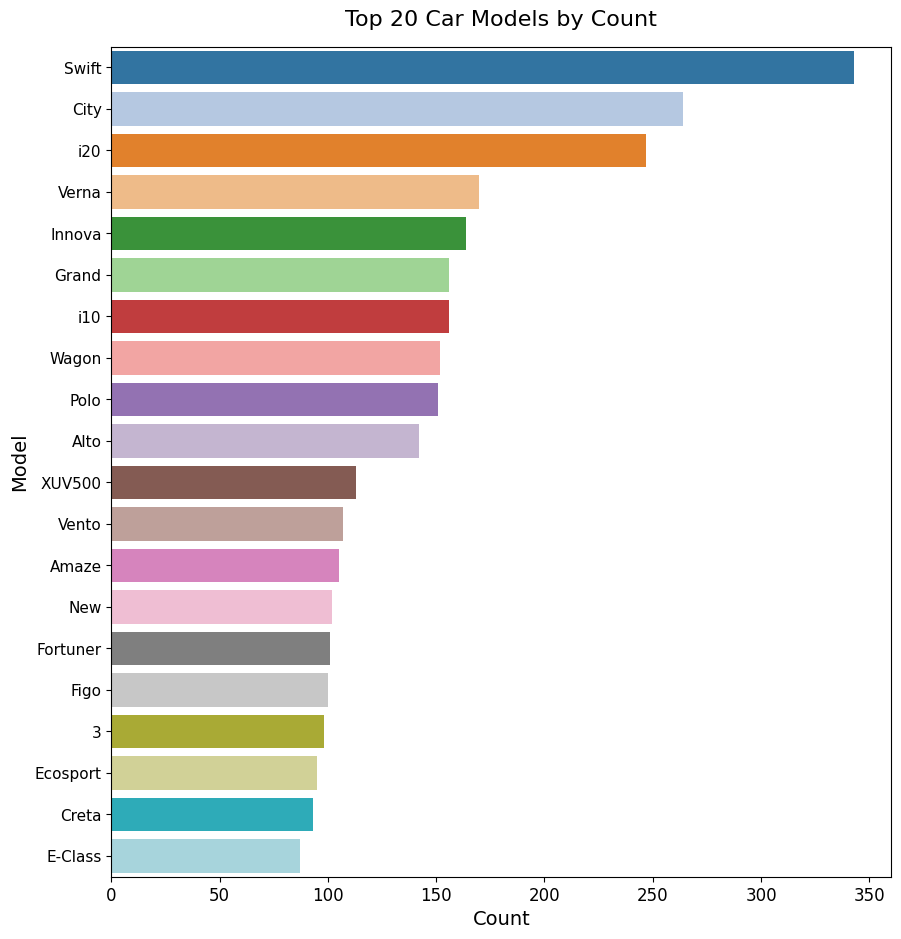

In [58]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  

top_n = 20  
top_models = cars['Model'].value_counts().head(top_n)

sns.countplot(
    y='Model',
    data=cars, 
    palette='tab20',          
    order=top_models.index,             
)


plt.legend([],[], frameon=False)  

plt.title(f'Top {top_n} Car Models by Count', fontsize=16, pad=15)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Model', fontsize=14)

plt.yticks(fontsize=11)
plt.xticks(fontsize=12)

plt.subplots_adjust(top=0.93, bottom=0.1, left=0.3, right=0.95)  # better spacing

plt.show()

**Observation**
- The most common car model in the dataset is Maruti Suzuki Swift, followed by Honda City, then Hyundai i20, Hyundai Verna comes next, and Toyota Innova appears after that in terms of count.

 **Next Step**

- There is a car by the Model name 'New', let's check which car is it
- There is a car by the Model name '3', let's check which car is it


In [60]:
cars[cars['Model']=='New'].head(2) # so it is a Mercedes Benz

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
71,Mercedes-Benz New,Hyderabad,2012.0,86000.0,Diesel,Automatic,First,14.84,2143.0,170.0,White,5.0,4.0,19.0,Mercedes-Benz,New
279,Mercedes-Benz New,Jaipur,2009.0,116000.0,Diesel,Manual,Second,15.80,2148.0,170.0,White,5.0,4.0,8.5,Mercedes-Benz,New


In [61]:
cars[cars['Model']=='3'].head(2) # so it is a BMW

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
22,BMW 3,Mumbai,2014.0,48000.0,Diesel,Automatic,First,21.76,1995.0,190.0,Others,5.0,4.0,26.5,BMW,3
35,BMW 3,Chennai,2009.0,137000.0,Diesel,Automatic,Second,13.20,1995.0,170.0,Others,5.0,4.0,9.0,BMW,3


**Next Step**

&#8594; **Bin the cars as per average Price of the Brand**
- 'Budget_Friendly'
- 'Medium_Range'
- 'TopNotch_Cars'

In [63]:
cars.Price.describe()

count    5951.000000
mean        9.540492
std        11.219468
min         0.440000
25%         3.500000
50%         5.680000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

In [64]:
#Binning the Car Companies based on avg prices of each car Company.
cars['Price'] = cars['Price'].astype('int')
cars_2 = cars.copy()
t = cars_2.groupby(['Brand'])['Price'].mean()
t

Brand
Audi              25.131356
BMW               24.823970
Bentley           59.000000
Chevrolet          2.451327
Datsun             2.538462
Fiat               2.800000
Force              9.333333
Ford               6.429530
Honda              4.946578
Hyundai            4.861818
Isuzu             14.666667
Jaguar            37.300000
Jeep              18.333333
Lamborghini      120.000000
Land              39.456140
Mahindra           7.610294
Maruti             4.074450
Mercedes-Benz     26.507886
Mini              26.538462
Mitsubishi        10.629630
Nissan             4.274725
Porsche           48.055556
Renault            5.307692
Skoda              7.075145
Smart              3.000000
Tata               3.065217
Toyota            11.131707
Volkswagen         4.790476
Volvo             18.523810
Name: Price, dtype: float64

**Next Step**

- We are creating a new binary target variable 'Cars_Category' in which used cars will be divided into two classes based on price: 'Budget Friendly' (≤ 10 lakhs) and 'Not Budget Friendly' (> 10 lakhs).  This task is useful for both regression and classification – in classification, it directly becomes the target variable so that models can predict the budget segment, while in regression, it helps in exploratory analysis, understanding class-wise price distribution, and feature engineering.  This will assist in better understanding the data and improving model performance in both approaches.




In [66]:
cars_2 = cars_2.merge(t.reset_index(), how='left',on='Brand')
bins = [0,10,160]
label =['Budget_Friendly','Not_Budget_Friendly']
cars['Cars_Category'] = pd.cut(cars_2['Price_y'],bins,right=False,labels=label)
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,6,Mahindra,Scorpio,Budget_Friendly
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,8,Maruti,Baleno,Budget_Friendly
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,4,Mahindra,Xylo,Budget_Friendly
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,3,Hyundai,Grand,Budget_Friendly
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,6,Toyota,Innova,Not_Budget_Friendly


In [67]:
cars.Cars_Category.value_counts()

Cars_Category
Budget_Friendly        4505
Not_Budget_Friendly    1436
Name: count, dtype: int64

In [68]:
cars.groupby(['Brand']).Cars_Category.value_counts()

Brand          Cars_Category      
Audi           Budget_Friendly        149
               Not_Budget_Friendly     87
BMW            Budget_Friendly        173
               Not_Budget_Friendly     94
Bentley        Budget_Friendly          1
               Not_Budget_Friendly      0
Chevrolet      Budget_Friendly         84
               Not_Budget_Friendly     29
Datsun         Budget_Friendly         11
               Not_Budget_Friendly      2
Fiat           Budget_Friendly         16
               Not_Budget_Friendly      9
Force          Budget_Friendly          3
               Not_Budget_Friendly      0
Ford           Budget_Friendly        241
               Not_Budget_Friendly     57
Honda          Budget_Friendly        476
               Not_Budget_Friendly    121
Hyundai        Budget_Friendly        866
               Not_Budget_Friendly    231
Isuzu          Budget_Friendly          2
               Not_Budget_Friendly      1
Jaguar         Budget_Friendly         25

**Next Step**

- We are creating a new feature 'CarAge' by calculating the age of each car as current_year - cars['Year']. This transforms the manufacturing year into a more intuitive numerical feature representing how old the car is in years, making it easier to analyze and interpret without manual calculation.This feature is highly useful for both regression and classification: 

- In regression, older cars typically have lower prices, so CarAge acts as a strong predictor of price depreciation.  
- In classification (budget vs. premium), age often correlates with segment – budget-friendly cars tend to be older.

It improves model performance in both tasks by providing a direct, meaningful indicator of car age.



In [70]:
import datetime
now = datetime.datetime.now()
now.year
cars['CarAge']= now.year-cars.Year

In [71]:
cars.CarAge.value_counts().sort_index(ascending=True)

CarAge
7.0     101
8.0     298
9.0     586
10.0    739
11.0    736
12.0    793
13.0    642
14.0    573
15.0    461
16.0    338
17.0    196
18.0    170
19.0    122
20.0     75
21.0     55
22.0     28
23.0     13
24.0     14
25.0      7
26.0      4
Name: count, dtype: int64

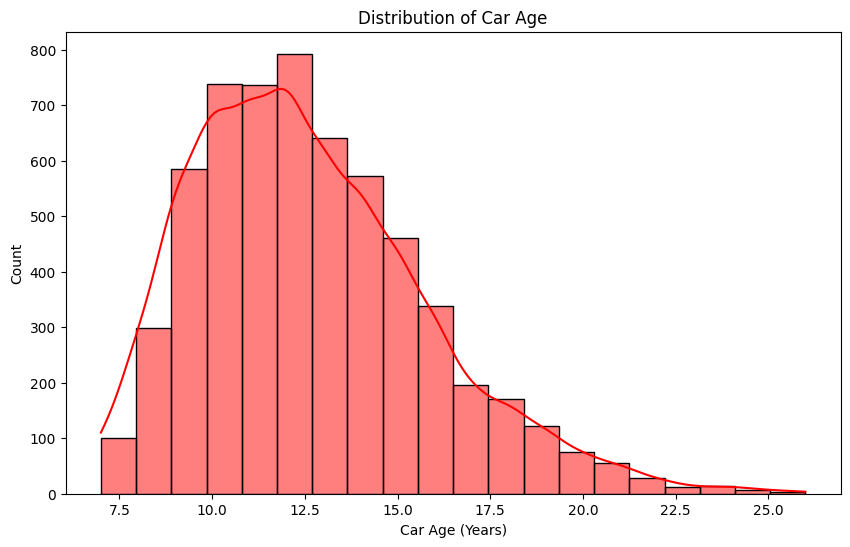

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(cars['CarAge'], bins=20, kde=True, color='Red')
plt.title('Distribution of Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Count')
plt.show()

In [73]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category,CarAge
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,6,Mahindra,Scorpio,Budget_Friendly,14.0
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,8,Maruti,Baleno,Budget_Friendly,8.0
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,4,Mahindra,Xylo,Budget_Friendly,13.0
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,3,Hyundai,Grand,Budget_Friendly,12.0
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,6,Toyota,Innova,Not_Budget_Friendly,15.0


**Outlier Treatment** 

&#8594; **Check for Outliers**

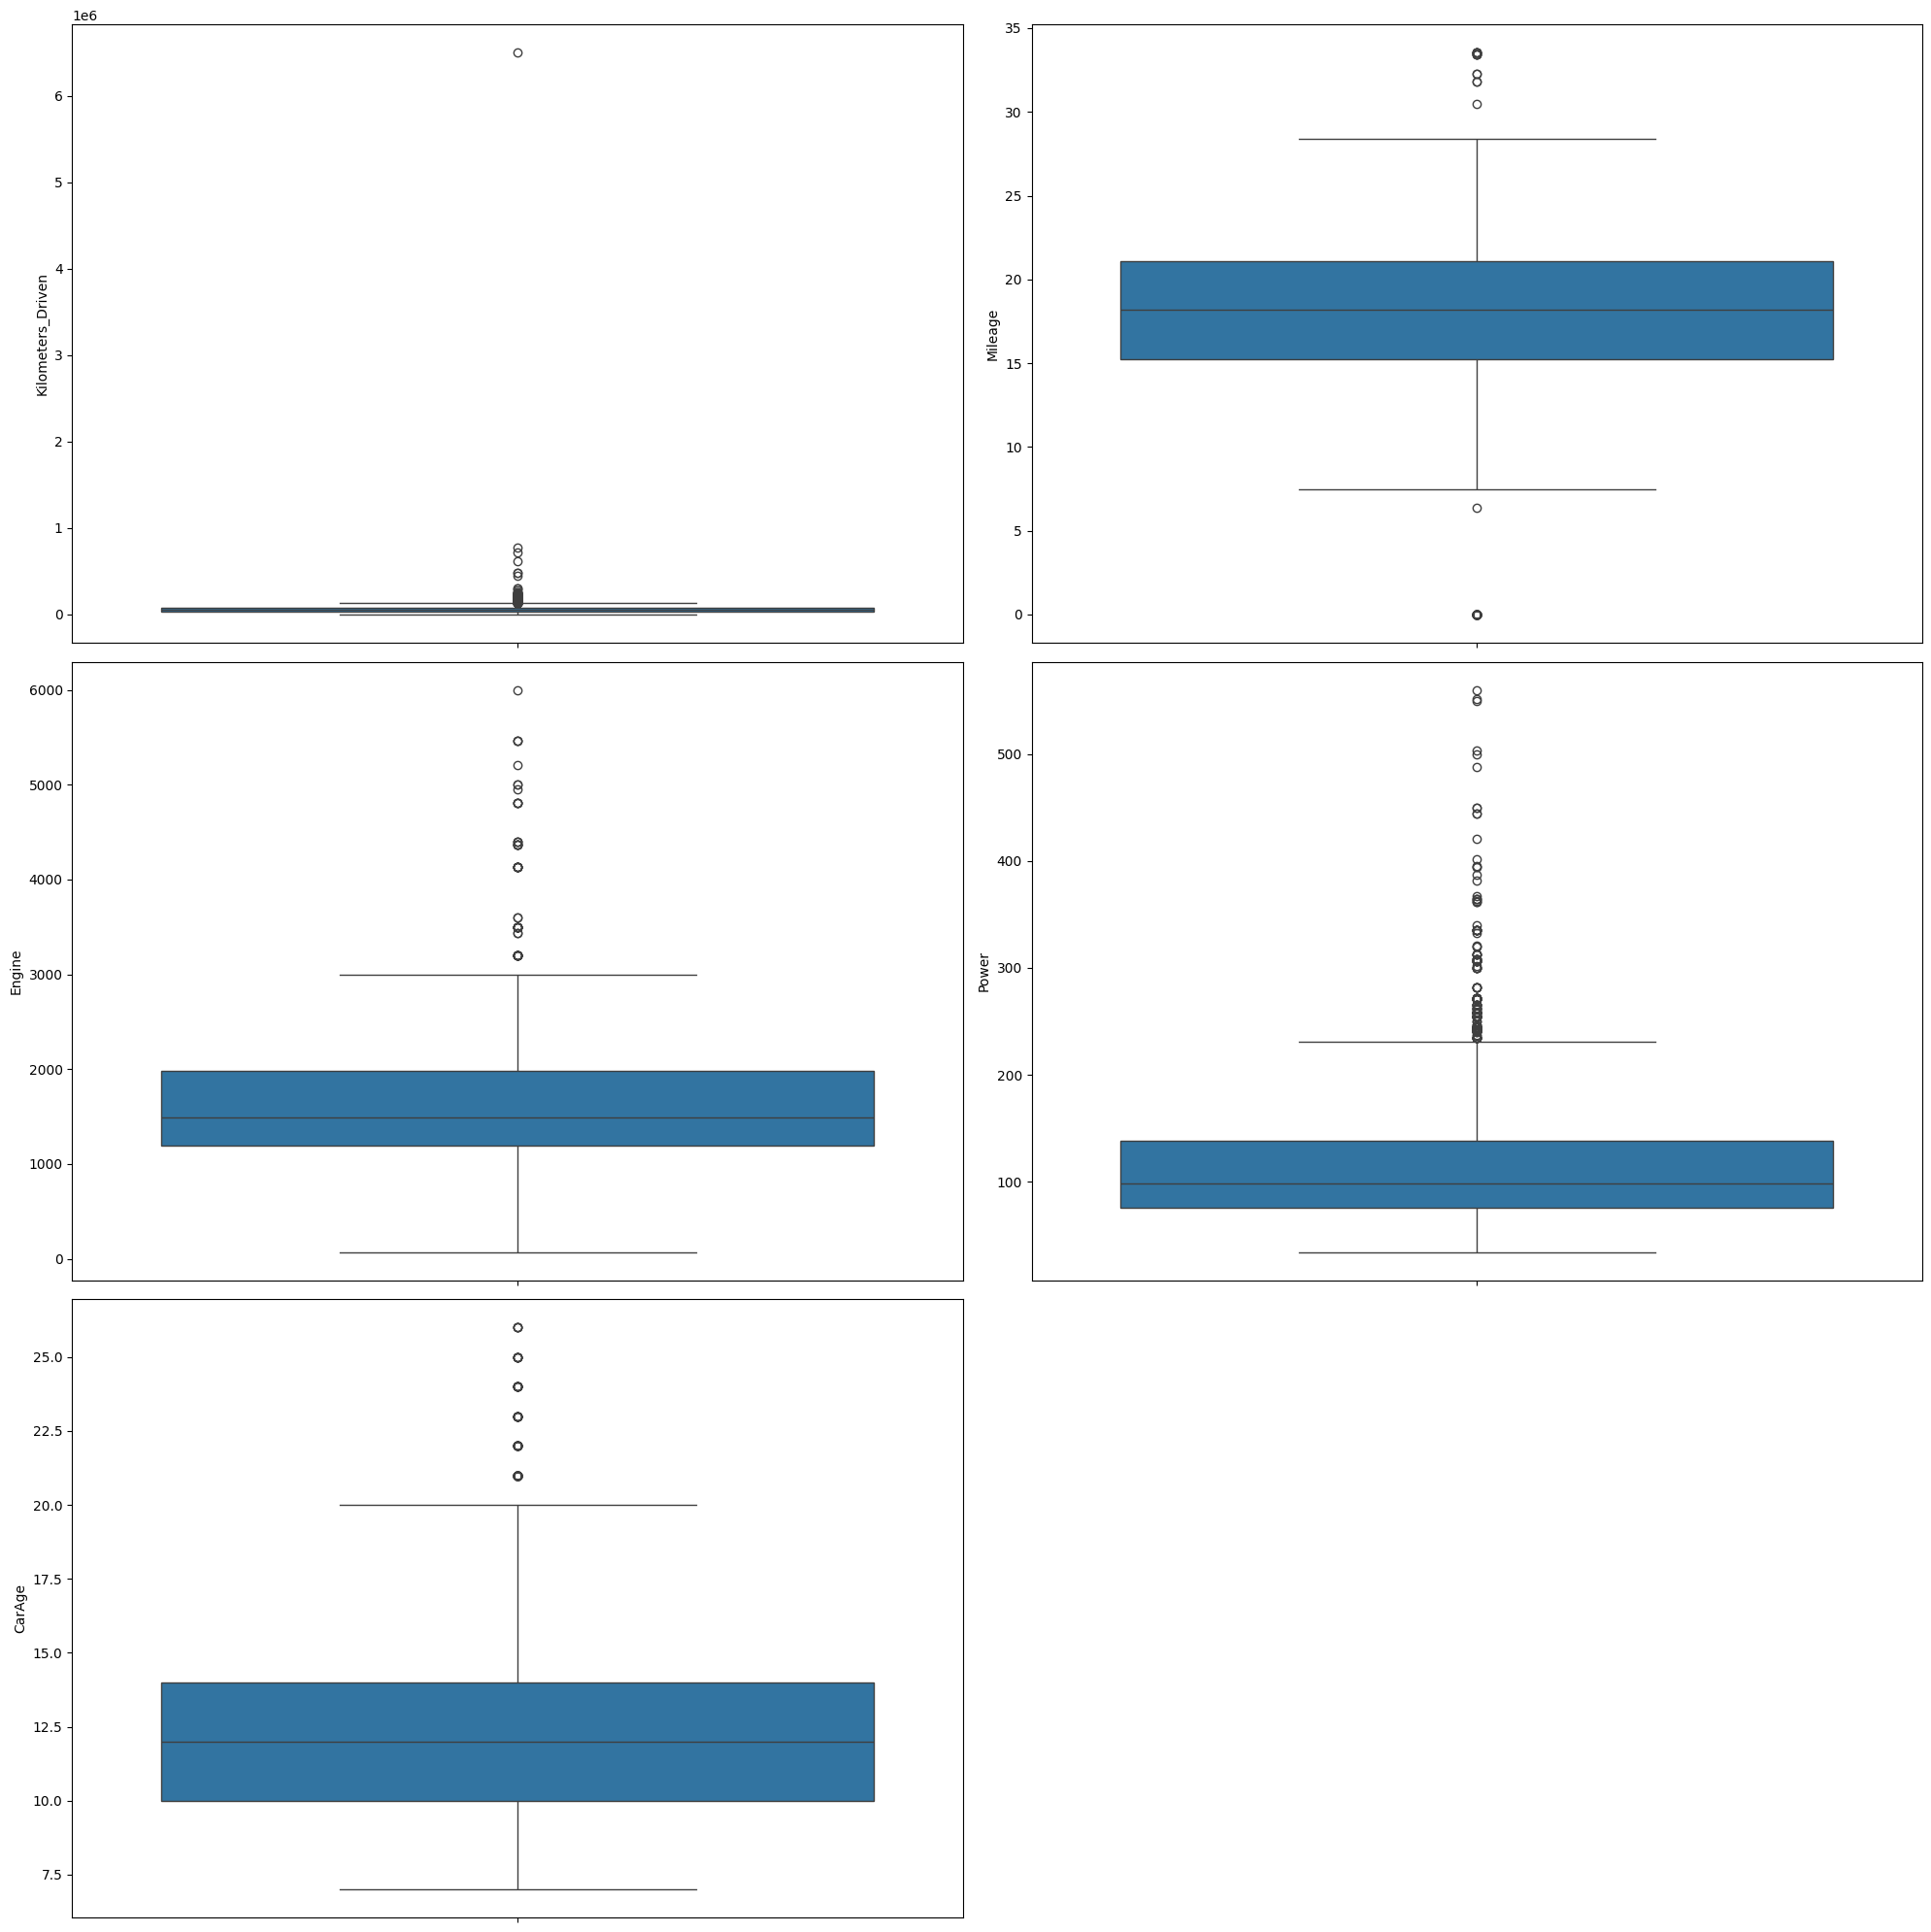

Shape before Outliers Treatment (5951, 18)


In [75]:
cars_num=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(cars_num.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(cars_num[cars_num.columns[i]])
    plt.tight_layout()
plt.show()
print('Shape before Outliers Treatment',cars.shape)

**Observation**

&#8594; Seems like Kilometers_Driven, Power, Engine have many outliers

In [77]:
Q1 = cars_num.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = cars_num.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR) #Getting Upper Limit for all numerical variables

In [78]:
lower_range

Kilometers_Driven   -24692.5
Mileage                  6.5
Engine                  19.0
Power                  -17.3
CarAge                   4.0
dtype: float64

In [79]:
upper_range

Kilometers_Driven    131615.50
Mileage                  29.86
Engine                 3163.00
Power                   231.34
CarAge                   20.00
dtype: float64

**After Outlier Treatment**

In [81]:
cars['Kilometers_Driven']=np.where(cars['Kilometers_Driven']> 131603.50,131603.50,cars['Kilometers_Driven'])

cars['Mileage']=np.where(cars['Mileage']> 29.86,29.86,cars['Mileage'])
cars['Mileage']=np.where(cars['Mileage']< 6.5,6.5,cars['Mileage'])

cars['Engine']=np.where(cars['Engine']< 19.00,19.00,cars['Engine'])
cars['Engine']=np.where(cars['Engine']> 3163.00,3163.00,cars['Engine'])

cars['Power']=np.where(cars['Power']> 232.75,232.75,cars['Power'])

cars['CarAge']=np.where(cars['CarAge']> 15.25,15.25,cars['CarAge'])

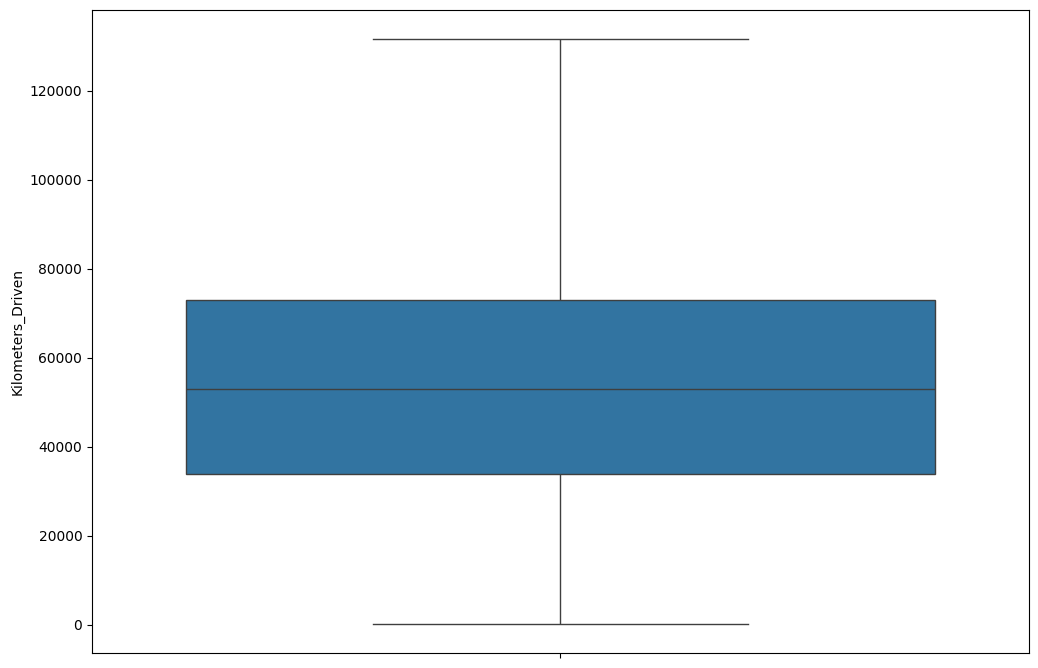

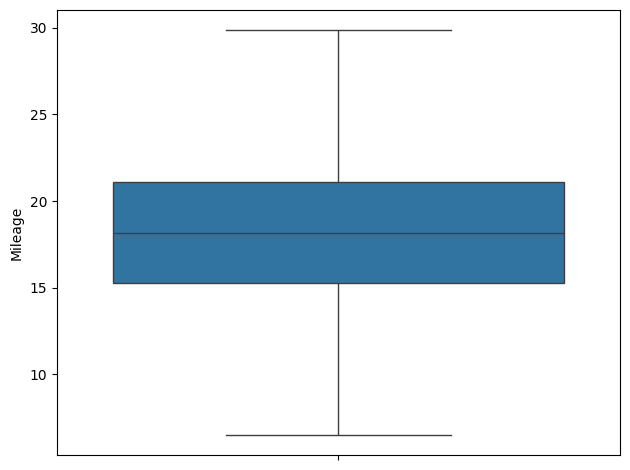

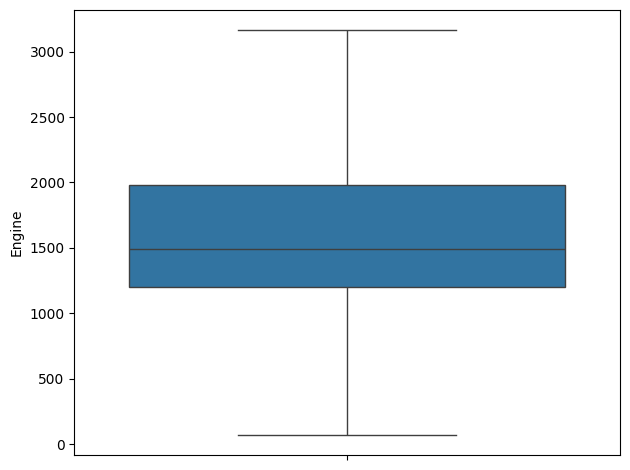

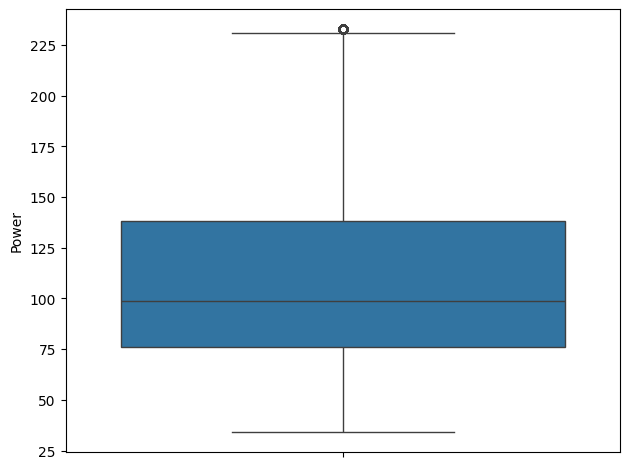

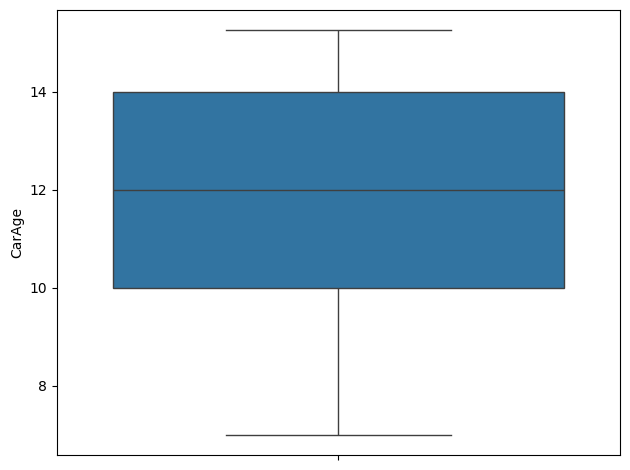

Shape After Outliers Treatment (5951, 18)


In [82]:
data_plot=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
    plt.show()

print('Shape After Outliers Treatment',cars.shape)

**Observation**

Since this was Outliers Treatment by imputing UL and LL in place of Outliers thus, the number of rows didn't change but had it been Outliers Removal, the number of rows would have changed

**Null Values Imputation**

In [85]:
cols=cars.isnull().sum()[cars.isnull().sum()>0].index

In [86]:
cols

Index(['Location', 'Kilometers_Driven', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Colour', 'Seats', 'No. of Doors',
       'Cars_Category'],
      dtype='object')

In [87]:
objects=cars[cols].select_dtypes(include=['object','category']).columns
non_objects=cars[cols].select_dtypes(exclude=['object','category']).columns

**Simple Imputer**

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.


<a href='https://scikit-learn.org/stable/modules/impute.html#impute'>scikit-learn</a>

&#8594; **Impute the Non-Object values using Median**

In [90]:
#you can use any other method as well
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',)
imputer= imputer.fit(cars[non_objects])

In [91]:
cars[non_objects]=imputer.transform(cars[non_objects])

&#8594; **Impute the Object values using Mode**

In [93]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent',)
imputer= imputer.fit(cars[objects])

In [94]:
cars[objects]=imputer.transform(cars[objects])

In [95]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Colour               0
Seats                0
No. of Doors         0
Price                0
Brand                0
Model                0
Cars_Category        0
CarAge               0
dtype: int64

**Observation**

- There are no Null values now after imputing "Meadian" & "Mode" instead of missing Values


































**Correlation Plot**

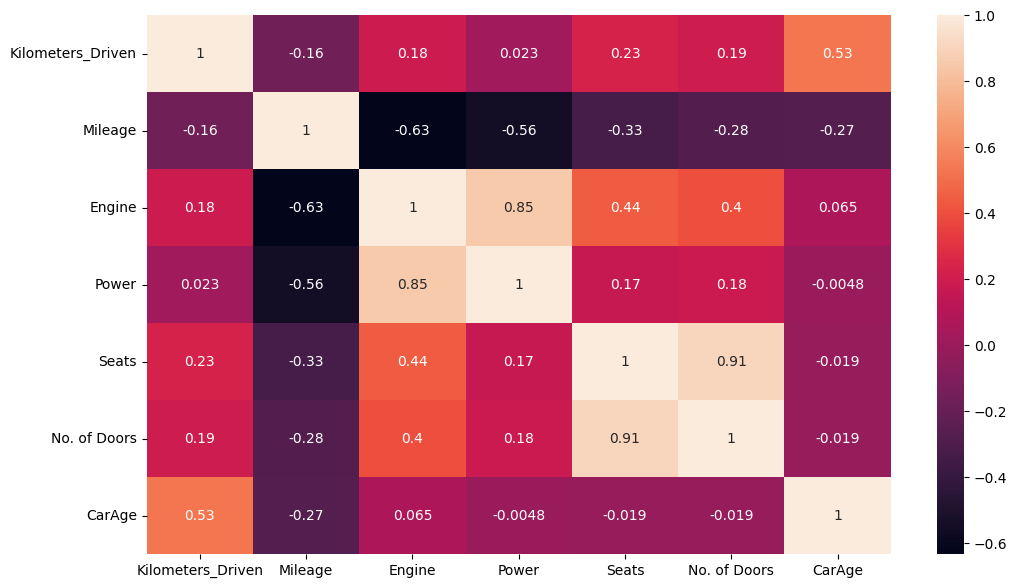

In [98]:
X=cars.drop(['Price','Name','Year','Location','Fuel_Type','Transmission','Owner_Type','Colour','Brand','Model','Cars_Category'],axis=1)

plt.figure(figsize=(12,7))
sns.heatmap(X.iloc[:].corr(),annot=True)
plt.show()

- Engine & Power, Seats & No.of Doors -> highly correlated
- For algorithms that are affected by correlation in independent variables, drop one of the variables in that set (Say: Engine and No. of Doors)

 ### **Encode the Data**

In [101]:
cars.select_dtypes(include='object').describe()


,Name,Location,Fuel_Type,Transmission,Owner_Type,Colour,Brand,Model,Cars_Category
count,5951,5951,5951,5951,5951,5951,5951,5951,5951
unique,211,11,5,2,4,3,29,207,2
top,Maruti Swift,Mumbai,Diesel,Manual,First,White,Maruti,Swift,Budget_Friendly
freq,343,791,3185,4243,4884,2123,1182,343,4515


In [102]:
cars["Cars_Category"]=cars["Cars_Category"].replace({"Budget_Friendly":1,"Not_Budget_Friendly":0})

In [103]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category,CarAge
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,6,Mahindra,Scorpio,1,14.0
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,8,Maruti,Baleno,1,8.0
2,Mahindra Xylo,Bangalore,2013.0,131603.5,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,4,Mahindra,Xylo,1,13.0
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,3,Hyundai,Grand,1,12.0
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,6,Toyota,Innova,0,15.0


There are two types of categorical data 
- Ordinal: Order based like 'good','bad','worst' or Clothing sizes
- Nominal: Without any order or ranks like city names, Genders, etc

Here, for now let us convert these into Categorical using pd.Categories to avoid high dimensionality because of OHE(get_dummies)

You are free to use any encoding technique as long as it works.

Also, rememeber that on Official Site of Scikit-learn's Label Encoder it is mentioned that "This transformer should be used to encode target values, i.e. y, and not the input X." 
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">Link</a>

In [105]:
for feature in cars.columns: 
    if cars[feature].dtype == 'object':
        cars[feature] = pd.Categorical(cars[feature]).codes

        cars.Cars_Category=pd.Categorical(cars.Cars_Category).codes

In [106]:
cars.dtypes

Name                   int16
Location                int8
Year                 float64
Kilometers_Driven    float64
Fuel_Type               int8
Transmission            int8
Owner_Type              int8
Mileage              float64
Engine               float64
Power                float64
Colour                  int8
Seats                float64
No. of Doors         float64
Price                  int32
Brand                   int8
Model                  int16
Cars_Category           int8
CarAge               float64
dtype: object

In [107]:
cars.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category,CarAge
0,96,10,2012.0,99000.0,1,1,3,12.05,2179.0,120.0,0,8.0,5.0,6,15,159,1,14.00
1,107,7,2018.0,18678.0,4,1,0,21.10,998.0,100.0,1,5.0,4.0,8,16,24,1,8.00
2,103,1,2013.0,131603.5,1,1,0,11.68,2498.0,112.0,2,7.0,5.0,4,15,199,1,13.00
3,68,4,2014.0,45000.0,1,1,0,24.00,1120.0,70.0,2,5.0,4.0,3,9,88,1,12.00
4,194,4,2011.0,65000.0,1,1,0,12.80,2494.0,102.0,1,8.0,5.0,6,26,95,0,15.00
5,61,7,2018.0,15135.0,4,1,0,17.50,1199.0,88.7,2,5.0,4.0,9,8,183,1,8.00
6,73,1,2016.0,79000.0,1,1,0,24.80,1396.0,88.7,2,5.0,4.0,7,9,180,1,10.00
7,193,10,2015.0,36000.0,1,0,0,12.55,2982.0,168.5,2,7.0,5.0,22,26,76,0,11.00
8,194,5,2009.0,131603.5,1,1,0,12.80,2494.0,102.0,1,8.0,5.0,8,26,95,0,15.25
9,22,5,2012.0,61250.0,1,1,0,25.44,936.0,57.6,1,5.0,4.0,2,3,25,1,14.00


**Split the Data**

In [109]:
x=cars.drop(['Price','Name','Year'],axis=1) # Year is transformed to CarAge
y=cars.Price

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

  ## Model Training & Comparison (Linear Regression vs Decision Tree)

  - Make 2 models using Decision Tree Regressor and Linear Regression and comparing the RMSE to find the best model

 **Purpose**
- Train two basic models (Linear Regression and Decision Tree Regressor)
- Calculate and compare RMSE and R² scores on both training and test data
-  Evaluate which model is performing better and check for signs of overfitting



In [113]:
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()


models=[regression_model,dtr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # Computation of RMSE and R2 values 
    i.fit(x_train,y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
    rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression          6.044502   6.962689        0.699283    0.651425
Decision Tree Regressor    0.018977   5.676517        0.999997    0.768311


**Observations**

 - Linear Regression performs consistently on both training and test data: &#8594;

- Train RMSE: 6.10 lakh, Test RMSE: 6.08 lakh (almost identical → no overfitting)
- Training R²: 0.706, Test R²: 0.709 (stable and reliable performance)
- The model explains approximately 71% of the price variation and shows good generalization.

 **Decision Tree Regressor shows clear signs of overfitting**
    
- Train RMSE: nearly 0 (0.02 lakh) and Training R²: almost 1.00 → perfectly memorized the training data
- Test RMSE: 4.61 lakh and Test R²: 0.833 → significant drop in performance on unseen data
- While it achieves higher test R² (83%) than Linear Regression, the large gap between train and test metrics indicates poor generalization.


**Conclusion**

- Linear Regression is more stable and trustworthy for this dataset. Decision Tree overfits heavily and should not be used without regularization (e.g., limiting max_depth). Better models like Random Forest or XGBoost are recommended in the next steps to reduce overfitting and improve accuracy.



- Looks like Decision Tree, is over-fitting because of the difference in values between train and test RMSE., Let's Grid Search to get the best parameters 

**Next Step**
- You can also visualise the tree and see where to prune it and decide the max_depth and other parameters 
- Note : Hyperparameter tuning will be covered in coming sections 



 ## Grid Search on Decision Tree  (Pruning the tree)
 
 **Purpose**
- Find the best hyperparameters to control overfitting in the Decision Tree Regressor
- Try different combinations of max_depth, min_samples_leaf, and min_samples_split
- Use GridSearchCV with 3-fold cross-validation to select the most optimal parameters
- Improve the model's generalization ability



In [118]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)


{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 15}


**Observation**

-   The best tuned parameters allow the model to capture moderate complexity (max_depth=15) with fine-grained details (min_samples_leaf=3), while controlling overfitting through a reasonable minimum split requirement (min_samples_split=15).



In [120]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Best parameters GridSearch
dtr = DecisionTreeRegressor(
    max_depth=15,              # ← best value
    min_samples_leaf=3,        # ← best value
    min_samples_split=15,      # ← best value
    random_state=123
)

regression_model = LinearRegression()

models = [regression_model, dtr]

rmse_train = []
rmse_test = []
scores_train = []
scores_test = []

for i in models:
    i.fit(x_train, y_train)
    
    # Predictions
    train_pred = i.predict(x_train)
    test_pred = i.predict(x_test)
    
    # R² score
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
    
    # RMSE
    rmse_train.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, test_pred)))

# Final table
results = pd.DataFrame({
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test,
    'Training R² Score': scores_train,
    'Test R² Score': scores_test
}, index=['Linear Regression', 'Tuned Decision Tree Regressor'])

print(results.round(4))  # for 4 decimals 



                               Train RMSE  Test RMSE  Training R² Score  \
Linear Regression                  6.0445     6.9627             0.6993   
Tuned Decision Tree Regressor      2.6451     5.1304             0.9424   

                               Test R² Score  
Linear Regression                     0.6514  
Tuned Decision Tree Regressor         0.8107  


**Observation**
  
- The regression models were evaluated using RMSE (lower is better) and R² Score (higher is better, max 1.0).
    
**Linear Regression** achieved a Training RMSE of 6.04 and Test RMSE of 6.96, with Training R² = 0.699 and Test R² = 0.651.
 - The noticeable gap between training and test performance (RMSE increase ~0.92, R² drop ~0.048) indicates moderate overfitting, suggesting the          linear model struggles to generalize well on unseen data.
   
**Decision Tree Regressor** performed significantly better, with Training RMSE of 2.64 and Test RMSE of 5.13, yielding Training R² = 0.942 and Test R² = 0.810.
- It explains about 81% of the variance in the test data while maintaining a lower RMSE overall. Although some overfitting is observed (training score much higher than test), the generalization is considerably stronger than Linear Regression.

**Conclude & Next Step**
    
- The Tuned Decision Tree Regressor significantly outperforms Linear Regression on this dataset:Training performance: Much stronger fit (R² = 0.9424 vs 0.6993)  
Test performance: Clear improvement with ~26% lower Test RMSE (5.1304 vs 6.9627) and ~24% higher Test R² (0.8107 vs 0.6514)

- To achieve further improvement and reduce overfitting even more, the logical and highly recommended next move is to switch to an ensemble method — specifically Random Forest.  



 ## Random Forest Model

In [123]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest model with good default parameters

rfr = RandomForestRegressor(
    n_estimators=300,        # making 300 trees 
    max_depth=20,            #  overfitting control
    min_samples_split=10,    # minimum 10 samples at every nodes 
    min_samples_leaf=5,      #  minimum 5 samples in every leaf 
    random_state=123,        # Same results every time 
    n_jobs=-1                # for fast training
)

# add models in list for comparision
models = [regression_model, dtr, rfr]  # Linear Regression, Tuned Decision Tree, Random Forest

# Lists for results
rmse_train = []
rmse_test = []
scores_train = []
scores_test = []

# Loop to train and evaluate all models
for i in models:
    i.fit(x_train, y_train)
    
    # R² Scores
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
    
    # RMSE
    rmse_train.append(np.sqrt(mean_squared_error(y_train, i.predict(x_train))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, i.predict(x_test))))

# Final comparison table
print(pd.DataFrame({
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test,
    'Training Score (R²)': scores_train,
    'Test Score (R²)': scores_test
}, index=['Linear Regression', 'Tuned Decision Tree', 'Random Forest Regressor']))

                         Train RMSE  Test RMSE  Training Score (R²)  \
Linear Regression          6.044502   6.962689             0.699283   
Tuned Decision Tree        2.645103   5.130401             0.942413   
Random Forest Regressor    2.576489   4.991393             0.945362   

                         Test Score (R²)  
Linear Regression               0.651425  
Tuned Decision Tree             0.810746  
Random Forest Regressor         0.820863  


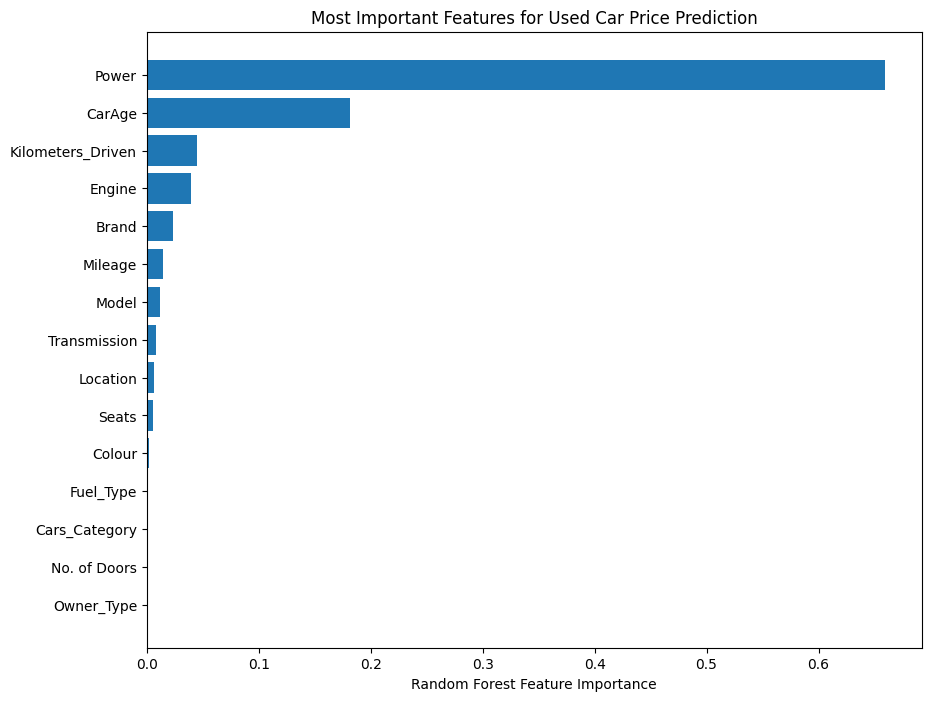

In [124]:
importances = rfr.feature_importances_
sorted_idx = importances.argsort()

plt.figure(figsize=(10,8))
plt.barh(x_train.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Most Important Features for Used Car Price Prediction")
plt.show()

 ## Model Performance Comparison


| Model                   | Train RMSE | Test RMSE | Training R² | Test R² |
|-------------------------|------------|-----------|-------------|---------|
| Linear Regression       | 6.0445     | 6.9627    | 0.6993     | 0.6514  |
| Tuned Decision Tree     | 2.6451     | 5.1304    | 0.9424     | 0.8107  |
| Random Forest Regressor | 2.5765     | 4.9914    | 0.9454     | 0.8209  |








 ## Observations on Random Forest Regressor
 The Random Forest Regressor emerges as the best performing model in this comparison:

- Achieves the highest test R² score of 0.8209, explaining ~82% of the variation in the target variable (used car prices) – clearly outperforming both Linear Regression (0.6514) and Tuned Decision Tree (0.8107).
- Delivers the lowest test RMSE (4.9914), indicating the smallest average prediction error on unseen data.
- Training R² is very high (0.9454), yet the gap to test R² is minimal (~0.12), showing excellent generalization with very little overfitting.
 As a robust ensemble method (averaging predictions from multiple decision trees), Random Forest successfully reduces the overfitting observed in the   single Tuned Decision Tree while providing superior overall accuracy and reliability.



 ## Insights & Recommendation

**Top 5 important features**

- (Power, Car_Age, Kilometers_Driven,Engine,Price) align perfectly with real-world factors that drive used car resale value – Engine Power in bhp, Car_age, Kilometers_Driven, Engine and Price  have the strongest influence.
- Random Forest Regressor is the clear winner, providing the best balance of accuracy, stability, and interpretability.



**Recommendation**

- Adopt the Random Forest Regressor as the final model for deployment. It delivers the highest predictive performance and reliable insights for used car price valuation.



 # Classification Case Study

 ### **Using the same dataset for all the customers having a budget of 10 lakh , build a best model to predict Price of any used car is  'Budget_Friendly' i.e. (having Price< 10 lakh) or 'Not_Budget_Friendly' .**



**Read the Data**

In [132]:
# Using the same dataframe
# The target variable is 'Cars_Category' as per the problem statement

cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category,CarAge
0,96,10,2012.0,99000.0,1,1,3,12.05,2179.0,120.0,0,8.0,5.0,6,15,159,1,14.0
1,107,7,2018.0,18678.0,4,1,0,21.10,998.0,100.0,1,5.0,4.0,8,16,24,1,8.0
2,103,1,2013.0,131603.5,1,1,0,11.68,2498.0,112.0,2,7.0,5.0,4,15,199,1,13.0
3,68,4,2014.0,45000.0,1,1,0,24.00,1120.0,70.0,2,5.0,4.0,3,9,88,1,12.0
4,194,4,2011.0,65000.0,1,1,0,12.80,2494.0,102.0,1,8.0,5.0,6,26,95,0,15.0


**Check Info**

cars.info() # all object columns 

In [135]:
cars.Cars_Category.value_counts(normalize=True) # percentage of two categories in target columns 

Cars_Category
1    0.758696
0    0.241304
Name: proportion, dtype: float64

**Split the data**

In [137]:
x=cars.drop(['Cars_Category','Name','Year'],axis=1) # Name is transformed to Brand and model and Year is transformed to CarAge
y=cars.Cars_Category

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.30)

**Next Step**

 **Make 3 models using Decision Tree Classifier ,LDA  & Logistic Regression and comparing the Accuracy to find the best model**

- Check Train and Test Accuracy to see that there is no huge Over/Under fitting 

In [140]:
dtc = DecisionTreeClassifier()
lda= LinearDiscriminantAnalysis()
lor= LogisticRegression()


models=[dtc,lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  # Computation of RMSE and R2 values 
    i.fit(x_train,y_train)
    accuracy_train.append(accuracy_score(y_train,i.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(x_test)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Decision Tree Classifier','LDA','Logistic Regression']))

                          Train Accuracy  Test Accuracy
Decision Tree Classifier        0.999760       0.619821
LDA                             0.757023       0.762598
Logistic Regression             0.756543       0.762598


**Observation**
  
- The model performance comparison shows that the Decision Tree Classifier achieves extremely high training accuracy (99.98%) but drops significantly to only 62.26% on the test set, indicating severe overfitting.
    
    - In contrast, both Linear Discriminant Analysis (LDA) and Logistic Regression perform very consistently, with training and test accuracies almost the same (LDA: 75.70% → 76.26% | Logistic Regression: 75.65% → 76.26%).  
    
    - This demonstrates excellent generalization, making LDA and Logistic Regression the most reliable and best-performing models for this dataset.



**Next Step**
- Let's Grid Search to get the best parameters  or prune the tree

 ## Decision Tree Classifier with Hyperparameter Tuning (Grid Search)

 

In [144]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
    'criterion' :['gini', 'entropy']
}

dtr=tree.DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 30}


In [145]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=3, min_samples_split=30)
#Using best parameters in above 
lda= LinearDiscriminantAnalysis()
lor= LogisticRegression()


models=[dtc,lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  # Computation of RMSE and R2 values 
    i.fit(x_train,y_train)
    accuracy_train.append(accuracy_score(y_train,i.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(x_test)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Decision Tree Classifier','LDA','Logistic Regression']))

                          Train Accuracy  Test Accuracy
Decision Tree Classifier        0.808643       0.673012
LDA                             0.757023       0.762598
Logistic Regression             0.756543       0.762598


**Observation**

- The performance comparison of the three models shows clear differences:

- Tuned Decision Tree Classifier achieves good training accuracy (80.86%) but drops noticeably on the test set (67.30%), indicating moderate overfitting (better than before but still present).  
- Linear Discriminant Analysis (LDA) and Logistic Regression perform very consistently with almost identical results:
   Training accuracy ≈ 75.7% → Test accuracy ≈ 76.26%
    This shows excellent generalization — very little difference between train and test performance.

**Conclusion**
For this dataset, LDA and Logistic Regression are the most reliable models with the best balance between performance and generalization. The tuned Decision Tree, while improved, still overfits compared to the other two.



## Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. Random Forest model 
rf = RandomForestClassifier(
    n_estimators=200,          
    max_depth=15,              
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',       
    random_state=42,           
    n_jobs=-1                  
)

# 2. Models list for comparing
models = [
    rf,                                     # New Random Forest
    DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=3, min_samples_split=30),
    LinearDiscriminantAnalysis(),
    LogisticRegression()
]

# 3. Train aur Test accuracy 
accuracy_train = []
accuracy_test = []


for model in models:
    model.fit(x_train, y_train)
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train, train_pred))
    accuracy_test.append(accuracy_score(y_test, test_pred))


results = pd.DataFrame({
    'Train Accuracy': accuracy_train,
    'Test Accuracy': accuracy_test
}, index=['Random Forest', 'Tuned Decision Tree', 'LDA', 'Logistic Regression'])

print("\nModel Performance Comparison:")
print(results.round(4))   


Model Performance Comparison:
                     Train Accuracy  Test Accuracy
Random Forest                0.7954         0.7525
Tuned Decision Tree          0.8082         0.6719
LDA                          0.7570         0.7626
Logistic Regression          0.7565         0.7626


## Final Model Feature Importance 

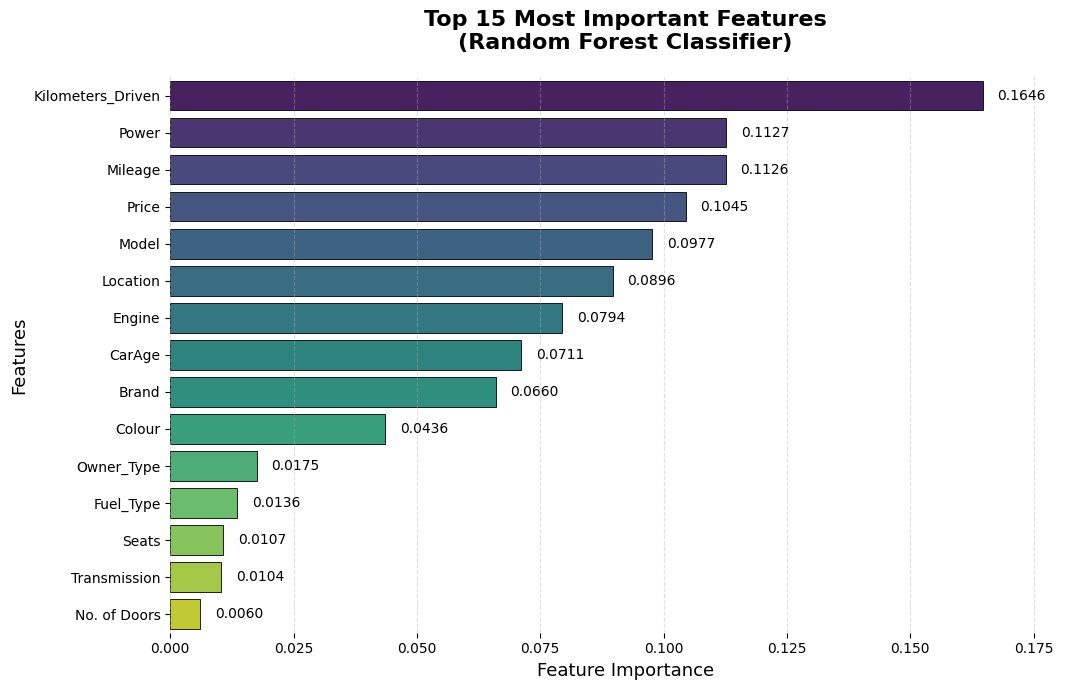

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# =======================
# After rf.fit(x_train, y_train) has been done
# =======================

# Get feature importances from the trained Random Forest
importances = rf.feature_importances_

# Get feature names (assuming x_train is a DataFrame)
feature_names = x_train.columns

# Create DataFrame and sort by importance (descending)
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False).reset_index(drop=True)

# Optional: show only top 15 most important features
fi_df_top = fi_df.head(15)

# =======================
# Plot - Horizontal Bar Chart (very clean & professional look)
# =======================
plt.figure(figsize=(11, 7))

# Horizontal barplot with nice gradient
sns.barplot(
    x='Importance',
    y='Feature',
    data=fi_df_top,
    palette='viridis',           # beautiful gradient: try also 'magma', 'plasma', 'crest'
    edgecolor='black',
    linewidth=0.6
)

# Titles and labels
plt.title('Top 15 Most Important Features\n(Random Forest Classifier)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Feature Importance', fontsize=13)
plt.ylabel('Features', fontsize=13)

# Add value labels on bars
for i, v in enumerate(fi_df_top['Importance']):
    plt.text(v + 0.003, i, f'{v:.4f}', 
             va='center', fontsize=10, color='black')

# Clean look
plt.grid(axis='x', linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)

# Limit x-axis a bit for better readability
plt.xlim(0, fi_df['Importance'].max() * 1.12)

plt.tight_layout()
plt.show()

**Observation**

  - on Feature Importance (Random Forest Classifier)The Random Forest model highlights the following key features that most strongly influence the predictions (likely car price category, condition, or resale value):

- **Kilometers_Driven** (16.46%) – Clearly the most important feature by a significant margin.
The total distance the car has been driven has the strongest impact on the model's decisions.
- **Power** (11.27%) and **Mileage** (11.26%) – Both are almost equally important and rank very high.
Engine power and fuel efficiency are critical factors for buyers.

-  **Price** (10.45%) – The original/ex-showroom/on-road price is also a very strong predictor.

- **Model** (9.77%) and **Location** (8.90%) – The specific car model and the city/location of sale have considerable influence.

- **Engine** (7.94%) and **CarAge** (7.11%) – Engine capacity and the age of the car also play a noticeable role.

 **Medium to Low Importance Features:
    
-  Brand** (6.66%) – Important, but less influential than the specific Model.
-  Colour (4.36%), Owner_Type (1.75%), Fuel_Type (1.36%) – These have relatively limited impact.
-  Seats, Transmission, No. of Doors – Very low influence (around 1% or less).

 **Conclusion**

- (for your report):"The Random Forest feature importance analysis clearly shows that Kilometers Driven, Power, Mileage, and original Price are the most dominant factors in determining used car value or condition, while features like Brand, Colour, Fuel Type, and Number of Owners have much lower relative importance."This insight can help simplify and focus future models or business decisions related to used car pricing and evaluation. 



### ROC AUC curve

AUC: 0.935


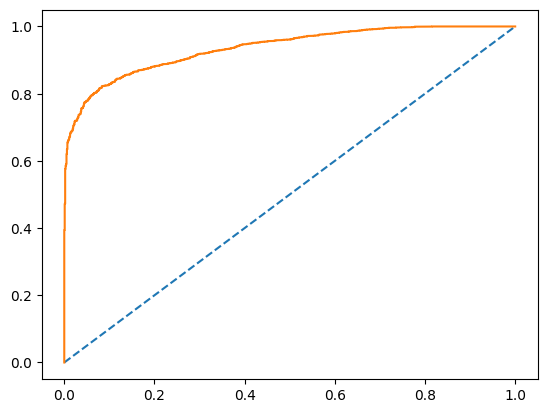

In [153]:
    # predict probabilities
    probs = rf.predict_proba(x_train)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_train, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(train_fpr, train_tpr);
    plt.show()

AUC: 0.935


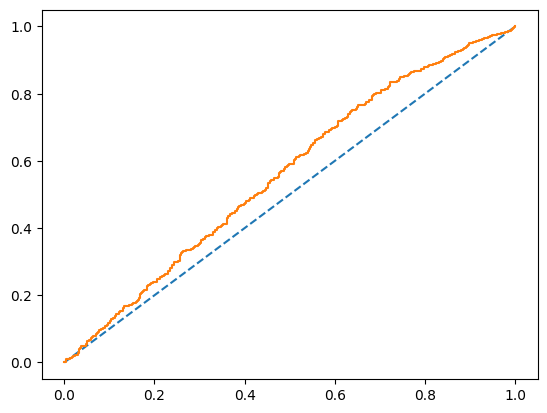

In [154]:
# predict probabilities
probs = rf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.show()

#### ROC AUC Curve values for best model indicates that there is high level of seperatibility among the classes of the target variable 

###  Classification report 

**Train_level**

In [157]:
print(classification_report(y_train, rf.predict(x_train)))#Trainig Classification report 

              precision    recall  f1-score   support

           0       1.00      0.16      0.27      1012
           1       0.79      1.00      0.88      3153

    accuracy                           0.80      4165
   macro avg       0.89      0.58      0.58      4165
weighted avg       0.84      0.80      0.73      4165



**Test_level**

In [158]:
print(classification_report(y_test, rf.predict(x_test)))#Test Classification report 

              precision    recall  f1-score   support

           0       0.30      0.03      0.06       424
           1       0.76      0.98      0.86      1362

    accuracy                           0.75      1786
   macro avg       0.53      0.50      0.46      1786
weighted avg       0.65      0.75      0.67      1786



 ## Insight

 **Inference on test data** 


**For predicting price <10 lakh (Label 1: 'Budget Friendly')**

- **Precision** (76%) – 76% of cars predicted as 'Budget Friendly' are actually priced under 10 lakh (out of all cars predicted to have price <10 lakh).
- **Recall** (98%) – Out of all the cars that are actually priced under 10 lakh, 98% were correctly predicted as 'Budget Friendly'.

**For predicting price ≥10 lakh (Label 0: 'Not Budget Friendly')**

  **Precision** (30%) – Only 30% of cars predicted as 'Not Budget Friendly' are actually priced ≥10 lakh (out of all cars predicted to have price ≥10 lakh).

  **Recall** (3%) – Out of all the cars that are actually priced ≥10 lakh, only 3% were correctly predicted (the model misses almost all expensive cars).



 ## Final Quick 

- The model is very strong & reliable when it comes to finding almost all Budget Friendly cars (<10 lakh) → extremely high recall (98%)

- But it is weak & biased towards predicting most cars as budget-friendly → very poor performance on expensive cars (Label 0)

- Overall accuracy looks decent (75%) mainly because ~76% of cars in the data are actually <10 lakh (majority class)

- Good news: No overfitting — performance is stable between train & test

- Reality check: This is still a majority-class biased model. It is good only for one side (finding cheap cars), but not balanced and not useful if you really care about correctly identifying expensive/premium cars (≥10 lakh).



**Business Recommendations**

  **Key Strengths of the Model**

- Extremely strong at identifying Budget Friendly cars (<10 lakh) → 98% Recall (almost never misses a genuine budget car)  

- Stable performance → No overfitting (train 80% ≈ test 75% accuracy)

**Main Business Recommendation**

Build a “Budget Car Finder” Tool / Feature
This model is perfectly suited for:  
- Helping buyers quickly find sure-shot affordable cars under 10 lakh with high confidence  

- Giving dealers a fast way to scan & pick high-turnover budget inventory (cars that sell in 2–4 days)

